### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [3]:
height = []
age = []
for elem in lista_alumnos:
    age.append(elem[2])
    height.append(elem[-1])

In [4]:
height

[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [5]:
age

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]

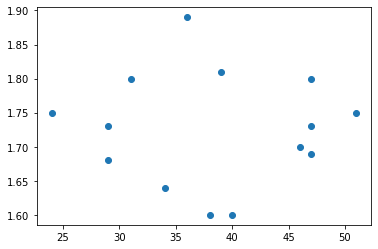

In [6]:
plt.scatter(age, height)

1. Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
#Create X, y value
X = np.asarray(age).reshape(-1, 1)
y = height
X.shape

(14, 1)

In [12]:
# Train, test split 80%, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
#Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

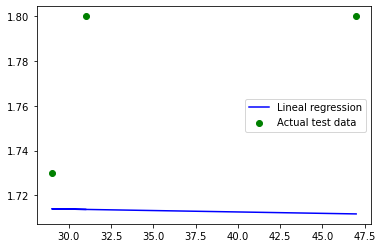

In [36]:
#Testing model
Y_predictions = model.predict(X_test)
#plot predictions line against actual test data
plt.plot(X_test, Y_predictions, label="Lineal regression", color="B")
plt.scatter(X_test, y_test, label="Actual test data", color="G")
plt.legend()
plt.show()

# Why not matching?

Text(0.5, 0, 'age')

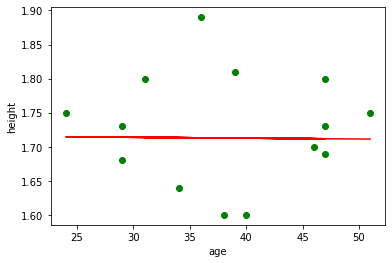

In [32]:
#plotting lineal regression line vs actual data.
plt.scatter(X, y, color="g")
plt.plot(X, model.predict(X), color="R")
plt.ylabel("height")
plt.xlabel("age")

In [37]:
# scoring the model
model.score(X_test, y_test)

#Why -3? could only be maximum 1.0?

-3.7396920396620583

2. - ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 

Me parece que no, porque no hay correlación en los datos y parece que el model no hace una prediccion buena. 


3. ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [38]:
from sklearn import metrics

In [48]:
print(model.predict(X_test))
print(y_test)

[1.71174713 1.71400373 1.713753  ]
[1.8, 1.73, 1.8]


In [42]:
#Calculating each error of each value in X_Test, Y_Test
error_list = []
error = 0
acum = 1
for i in range(len(y_test)):
    error += abs(y_test[i] - model.predict(X_test)[i])
    error_list.append(error)

print(error_list)

[0.08825286743131477, 0.10424913310216, 0.19049613230194629]


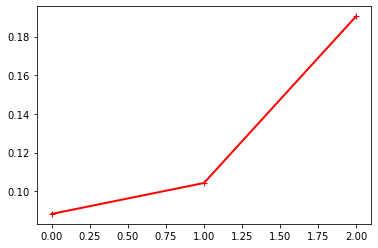

In [43]:
plt.plot(error_list, "r-+", linewidth=2, label="train")

In [52]:
print("MAE = ", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

MAE =  0.06349871076731543
MSE: 0.005160997998743139
RMSE: 0.07184008629409586


¿Alguno es mejor para este problema?

RMSE is better, because it focusses more on the outliers (?)

4. Representa la matriz de correlación, ¿los datos están correlacionados?

In [58]:
import seaborn as sns

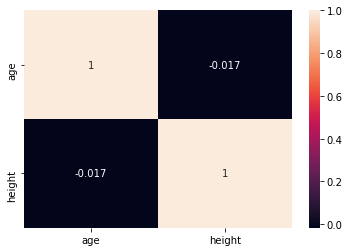

In [59]:
df = pd.DataFrame({'age':age, 'height':height})
sns.heatmap(df.corr(), annot = True)

#There is no correlation between the data of age and height.

5. - ¿Qué ocurre si la altura se multiplica por dos? 

In [72]:
 #multiply values of height
 y2 = [element * 2 for element in height]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2)
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

Text(0.5, 0, 'age')

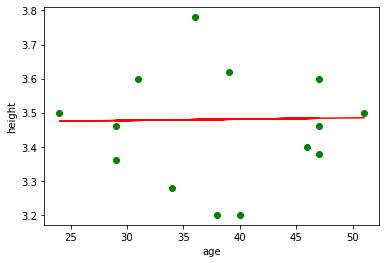

In [78]:
plt.scatter(X, y2, color="g")
plt.plot(X, model_2.predict(X), color="R")
plt.ylabel("height")
plt.xlabel("age")

In [79]:
print("MAE = ", metrics.mean_absolute_error(y_test, model_2.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, model_2.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_2.predict(X_test))))

MAE =  0.12854064642507357
MSE: 0.019055289507991364
RMSE: 0.138040897954162


The errors increased.